<a href="https://colab.research.google.com/github/Robbysaidiii/Submission-mc211d5y2136-/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_RobbySaiddi_(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,QuantileTransformer
import umap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [100]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df=pd.read_csv('/content/drive/MyDrive/bank_transactions_data_1.csv')


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [102]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

fitur object/string : TransactionID, AccountID, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerOccupation

fitur numerik : TransactionAmount, CustomerAge, TransactionDuration , LoginAttempt, AccountBalance

fitur waktu yang perlu diubah : TransactionDate, PreviousTransactionDate.

In [103]:
# mengubah tipe data time series
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [104]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


tidak ada dta yng hilang jadi tidak perlu menggitika nilai yang hilang atau menghapus data yang hilng

In [105]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada nilai baris yang terduplikat

In [106]:
# identifikasi statistik deskriptif
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23



1. **TransactionID**: ID transaksi yang unik untuk setiap transaksi.
   - **Unique**: 2512 ID transaksi yang berbeda.
   - **Top Value**: `TX002496` adalah ID transaksi yang paling sering muncul (muncul sekali).

2. **AccountID**: ID akun yang unik.
   - **Unique**: 495 akun yang berbeda.
   - **Top Value**: `AC00460` muncul 12 kali.

3. **TransactionAmount**: Jumlah uang untuk setiap transaksi.
   - **Rata-rata**: Jumlah transaksi rata-rata sekitar 297,59.
   - **Min**: Transaksi terkecil adalah 0,26.
   - **Max**: Transaksi terbesar adalah 1919,11.
   - **Deviasi Standar**: 291,95, menunjukkan variasi yang cukup besar dalam jumlah transaksi.

4. **TransactionDate**: Tanggal dan waktu transaksi terjadi.
   - **Rata-rata Tanggal**: Tanggal dan waktu rata-rata transaksi adalah 2023-07-05 20:32:10.
   - **Rentang**: Transaksi pertama terjadi pada 2023-01-02, dan yang terakhir pada 2024-01-01.

5. **TransactionType**: Jenis transaksi (misalnya Debit, Kredit).
   - **Top Value**: Jenis transaksi yang paling banyak adalah "Debit" (1944 kali).

6. **Location**: Lokasi geografis terkait dengan transaksi.
   - **Top Location**: Fort Worth muncul paling sering (70 kali).

7. **DeviceID**: ID perangkat yang digunakan untuk transaksi.
   - **Unique**: 681 perangkat yang berbeda.
   - **Top Value**: Device ID `D000548` adalah yang paling sering digunakan.

8. **IP Address**: Alamat IP yang terkait dengan transaksi.
   - **Unique**: 592 alamat IP yang berbeda.
   - **Top Value**: `200.136.146.93` adalah alamat IP yang paling sering muncul.

9. **MerchantID**: ID pedagang yang terlibat dalam transaksi.
   - **Unique**: 100 pedagang yang berbeda.
   - **Top Value**: Merchant ID `M026` muncul 45 kali.

10. **Channel**: Saluran tempat transaksi diproses (misalnya, Cabang, Online).
    - **Top Value**: "Cabang" adalah saluran yang paling sering digunakan.

11. **CustomerAge**: Usia pelanggan yang melakukan transaksi.
    - **Rata-rata Usia**: Rata-rata usia pelanggan adalah 44,67 tahun.
    - **Rentang**: Pelanggan termuda berusia 18 tahun dan tertua 80 tahun.

12. **CustomerOccupation**: Pekerjaan pelanggan.
    - **Top Value**: "Pelajar" adalah pekerjaan yang paling sering muncul.

13. **TransactionDuration**: Durasi proses transaksi.
    - **Rata-rata**: 119,64 detik.
    - **Min**: 10 detik.
    - **Max**: 300 detik.

14. **LoginAttempts**: Jumlah percobaan login yang dilakukan oleh pelanggan sebelum menyelesaikan transaksi.
    - **Rata-rata**: 1,12 percobaan login per transaksi.
    - **Max**: 5 percobaan login.

15. **AccountBalance**: Saldo akun pelanggan pada saat transaksi.
    - **Rata-rata Saldo**: 5114,30.
    - **Min**: 101,25.
    - **Max**: 14977,99.

16. **PreviousTransactionDate**: Tanggal transaksi sebelumnya.
    - **Rata-rata**: Transaksi sebelumnya terjadi pada 2024-11-04 08:09:22.
    - **Rentang**: Transaksi sebelumnya yang pertama terjadi pada 2024-11-04 08:06:23, dan yang terakhir pada 2024-11-04 08:12:23.




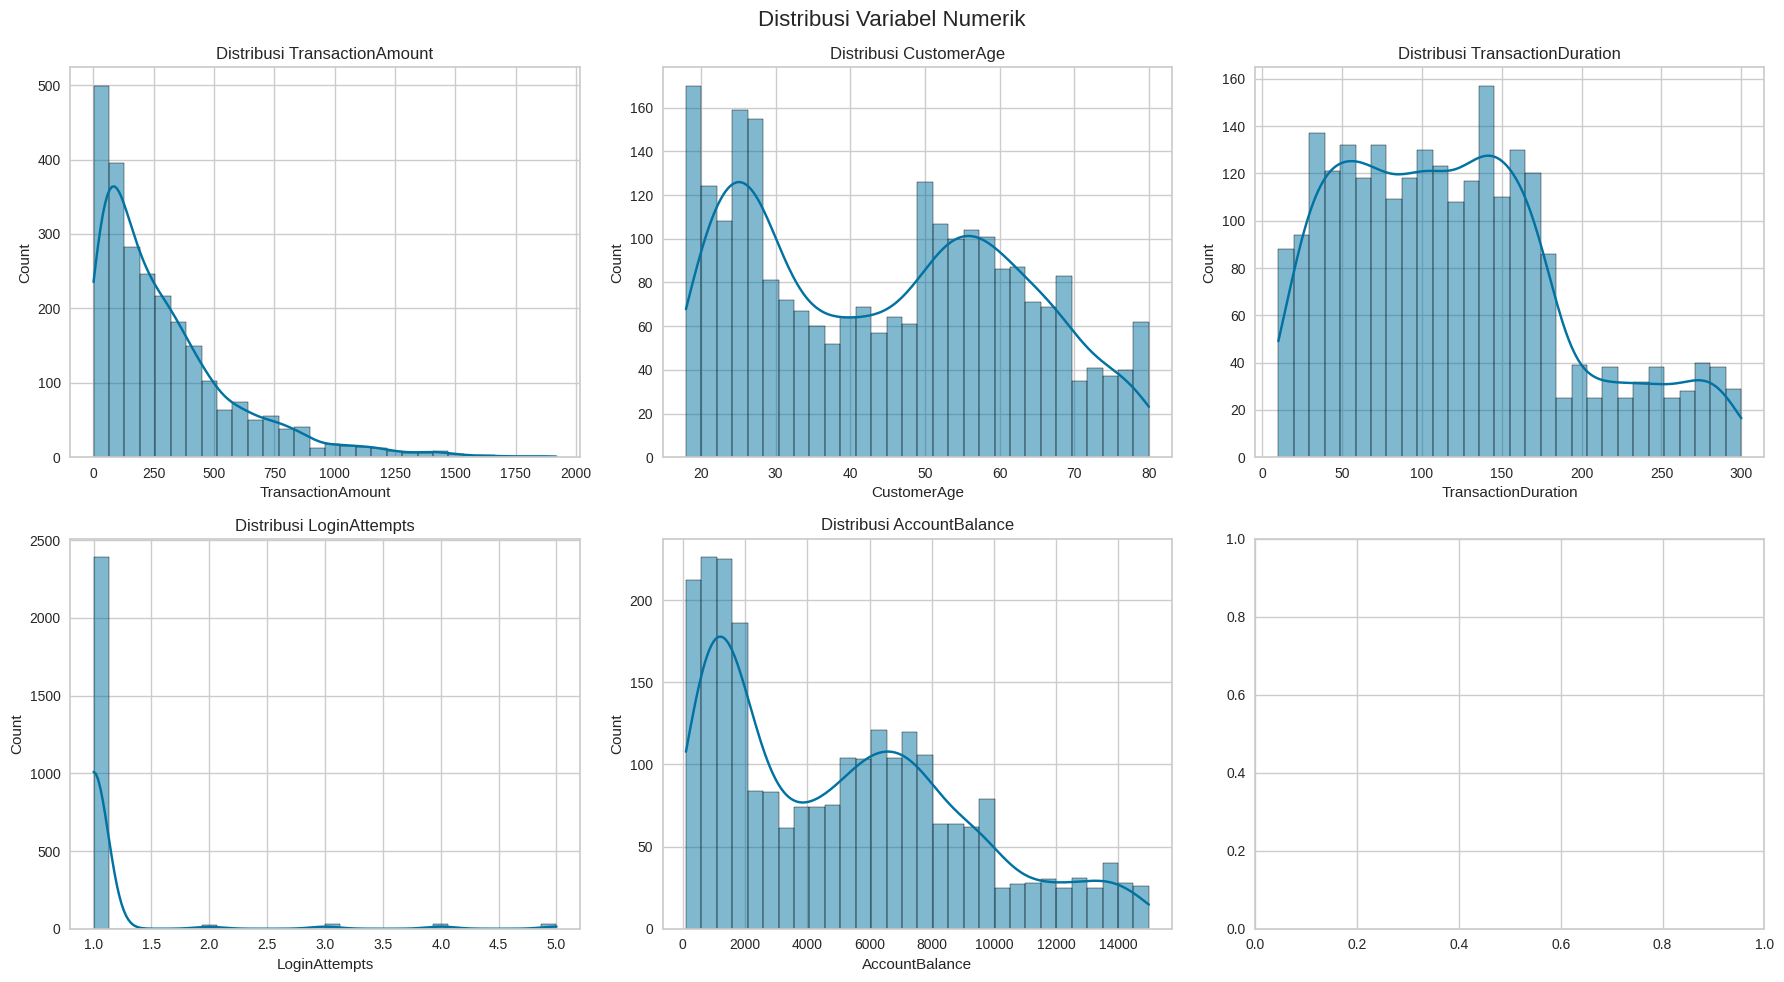

In [107]:
# distribusi data fitur numerik menggunakan histogram
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribusi Variabel Numerik", fontsize=16)

for i, col in enumerate(numeric_columns):
    row, col_idx = divmod(i, 3)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

visualisasi fitur numerik

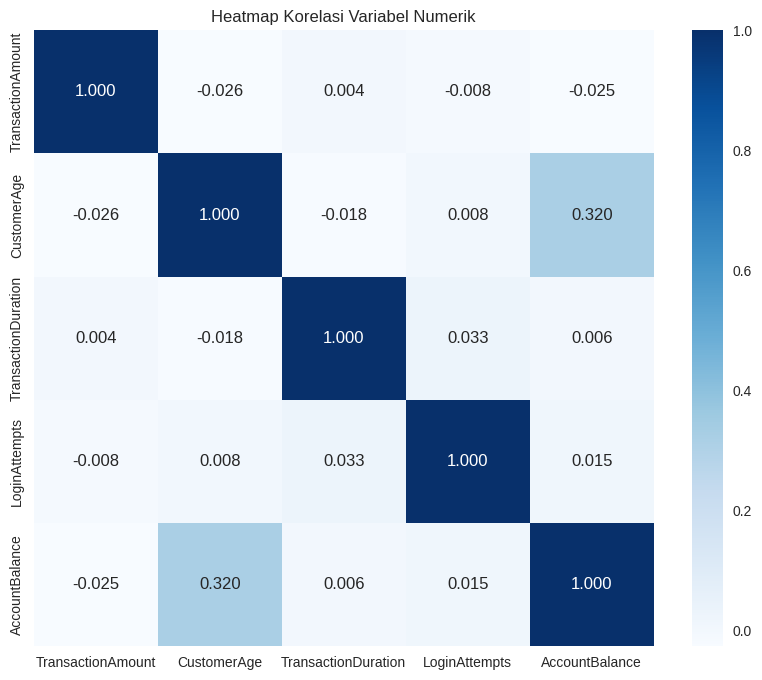

In [108]:
# heatmap untuk menganalisis korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Blues', fmt='.3f')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

Korelasi tertinggi adalah antara CustomerAge dan AccountBalance (0.320).

Korelasi terendah adalah antara CustomerAge dan TransactionAmount dan juga antara variabel AccountBalance dan TransactionAmount dan juga LoginAttempts dan TransactionAmount.

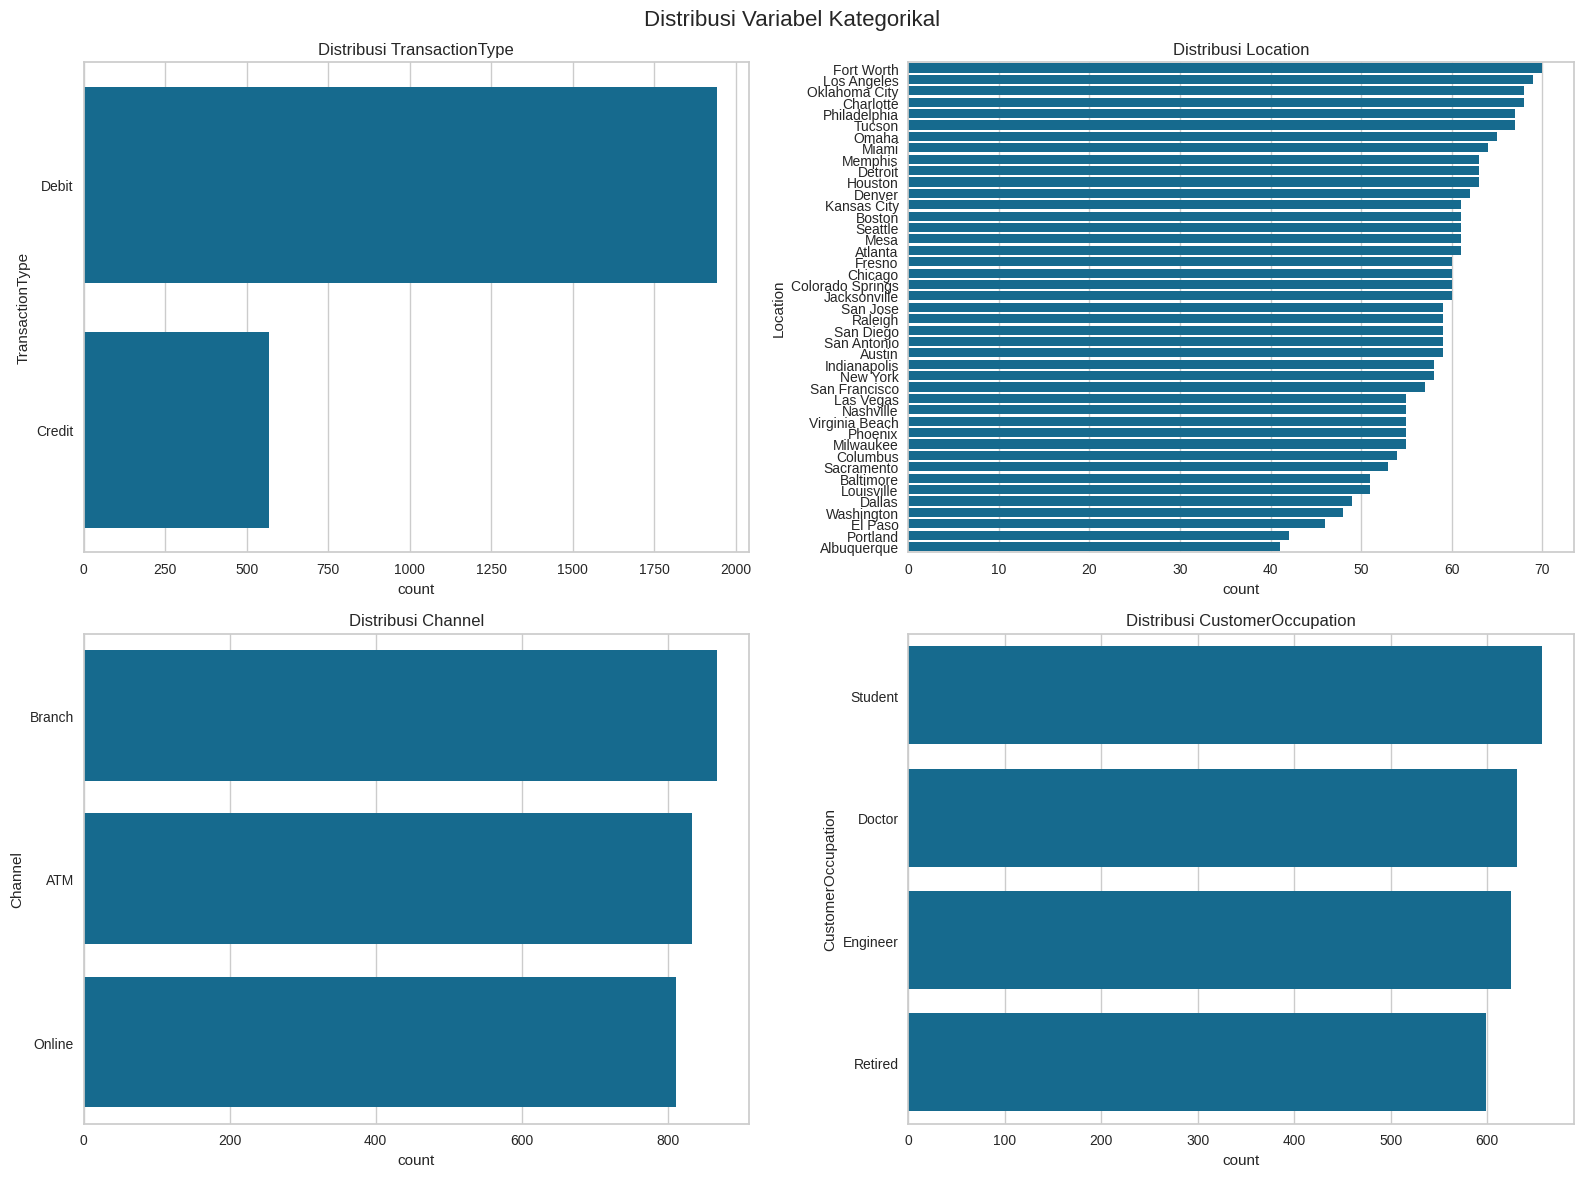

In [109]:
# distribusi data fitur kategorikal
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Distribusi Variabel Kategorikal", fontsize=16)

for i, col in enumerate(categorical_columns):
    row, col_idx = divmod(i, 2)
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

ransactionType : lebih banyak penggunaan debit

Location : 3 Lokasi transaksi terbanyak ada di wilayah Fort Worth, Los Angeles, dan Oklahoma City

Channel : visualisasi data menunjukan transaksi terbanyak dilakukan di kantor cabang

CustomerOccupation : lebih banyak murid/mahasiswa yang melakukan transaksi, dan paling sedikit transaksi dilakukan oleh pensiunan



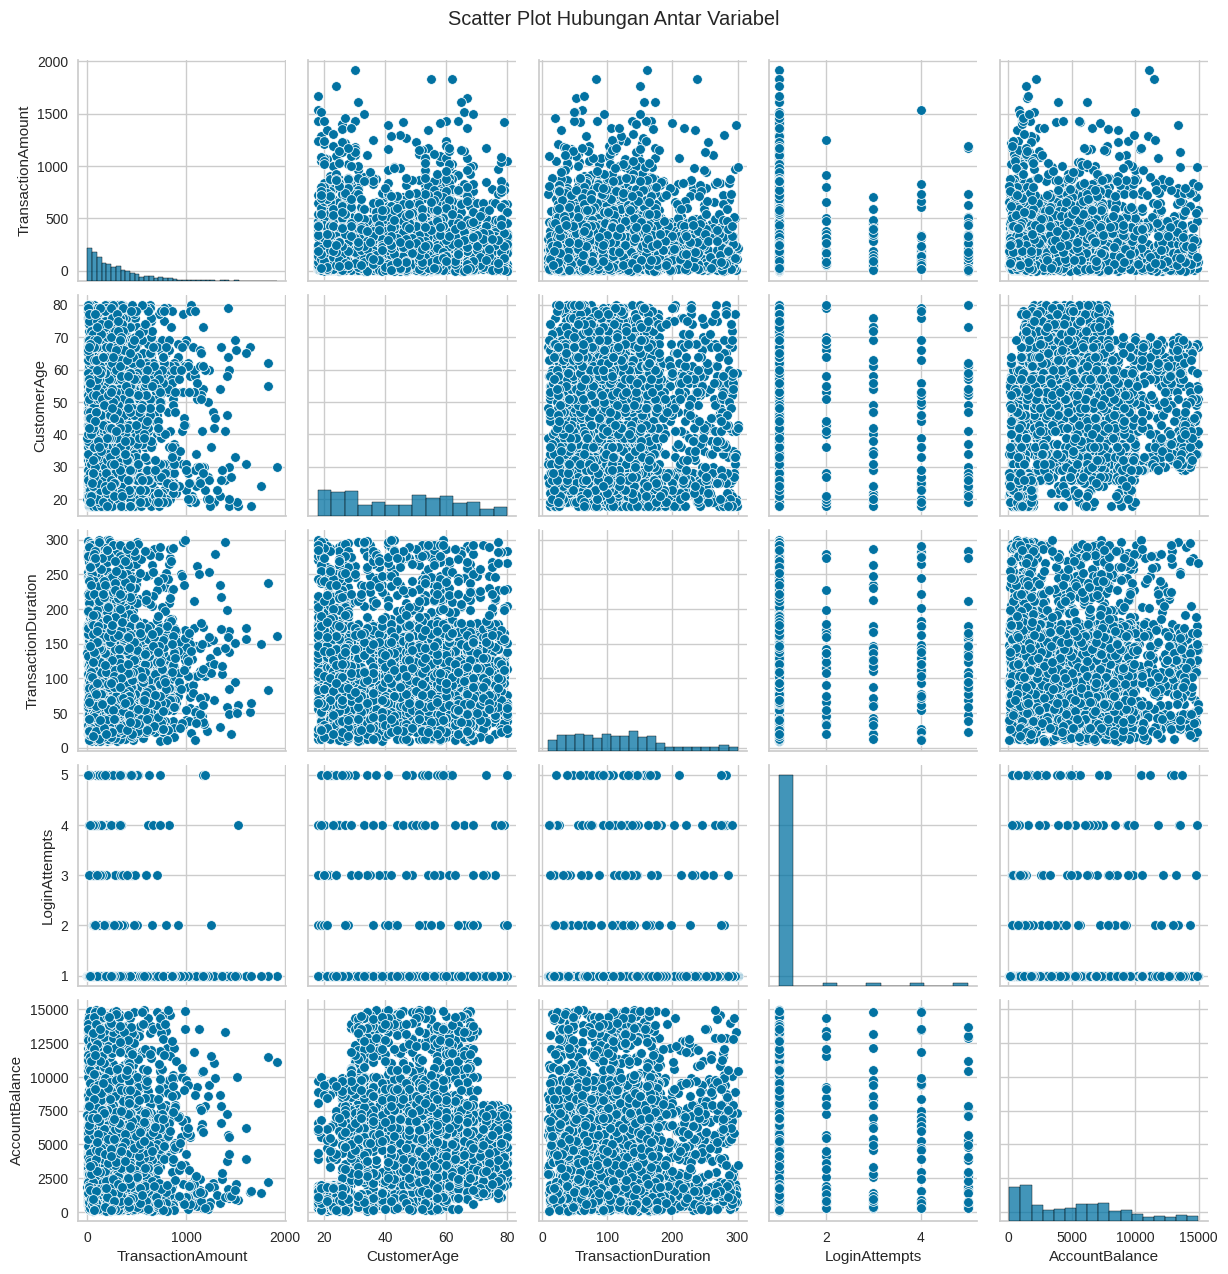

In [110]:
sns.pairplot(df)
plt.suptitle('Scatter Plot Hubungan Antar Variabel', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

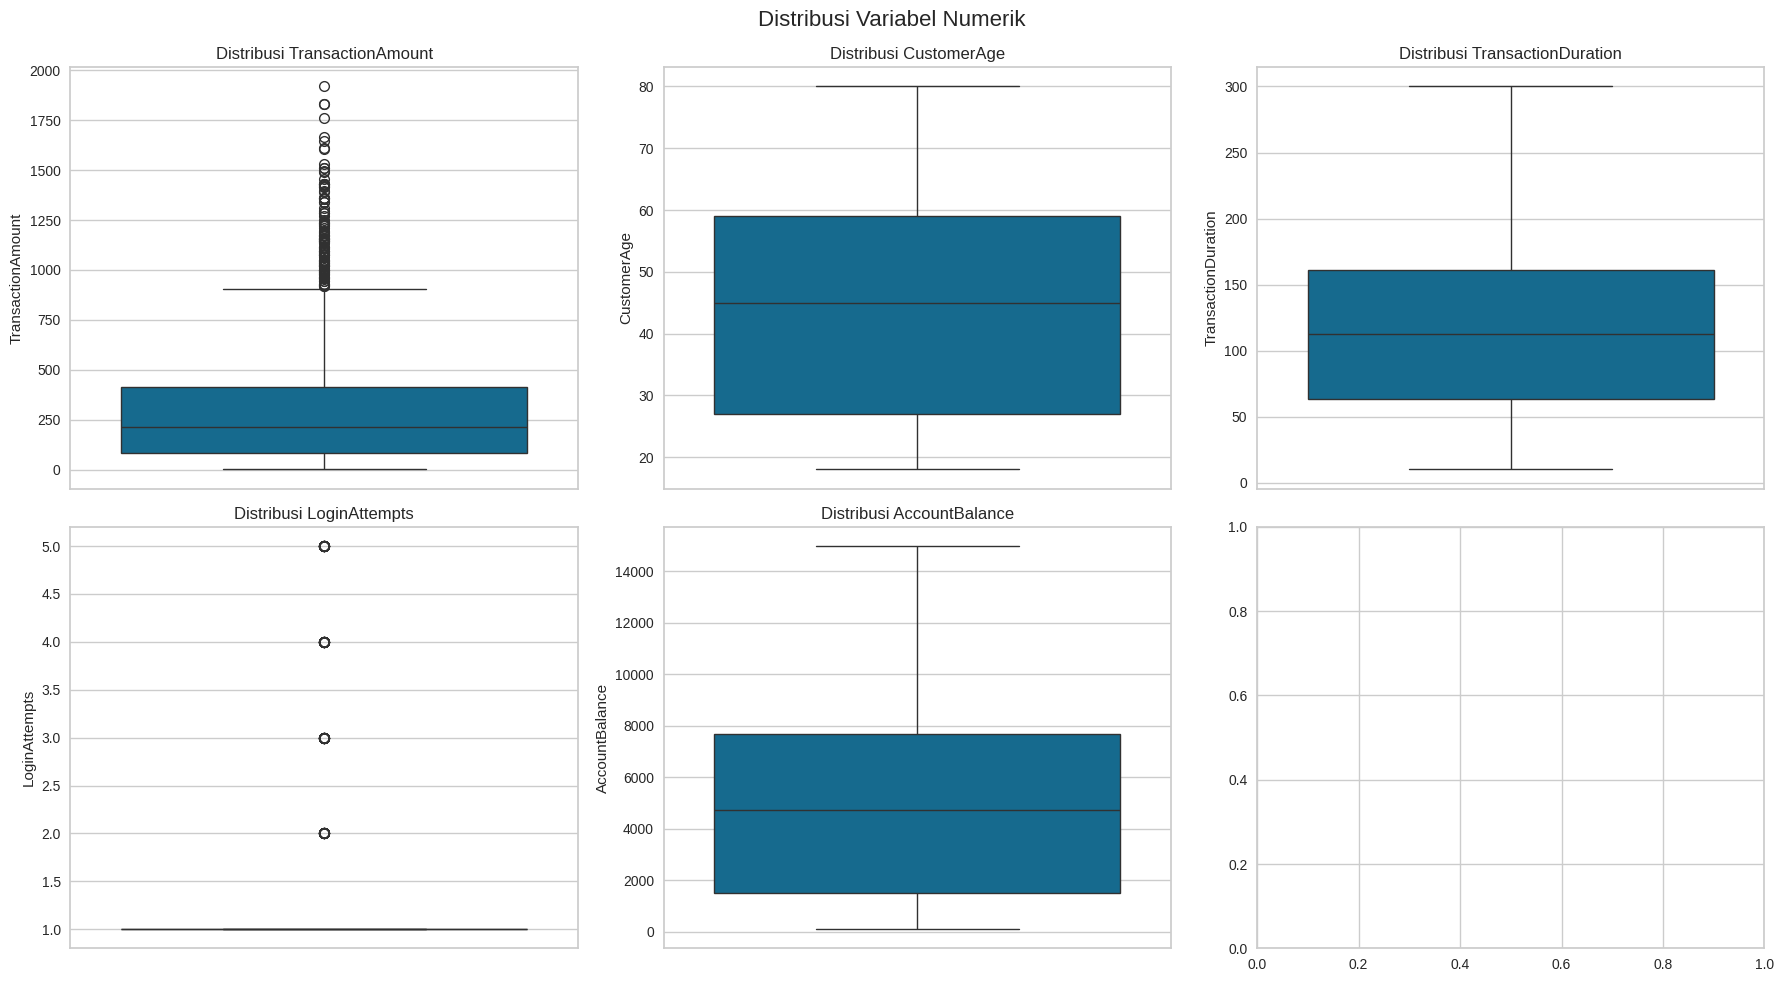

In [111]:
# boxplot untuk melihat outliers
numeric_columns =df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribusi Variabel Numerik", fontsize=16)

for i, col in enumerate(numeric_columns):
    row, col_idx = divmod(i, 3)
    sns.boxplot(df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

dapat dilihat dari visualisasi terdapat 2 kolom yag outlier TransactionAmoun dan LoginAttempts	tidk perlu di hapus outlier nya karna penting untuk melihat fraud / aomali yang mencurigakan

In [112]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# detail outliers
outliers_summary = {}
for col in numeric_columns:
    outliers = detect_outliers(df, col)
    outliers_summary[col] = len(outliers)

outliers_summary

{'TransactionAmount': 113,
 'CustomerAge': 0,
 'TransactionDuration': 0,
 'LoginAttempts': 122,
 'AccountBalance': 0}

TransactionAmount: Ada 113 nilai outlier pada kolom TransactionAmount. Ini menunjukkan bahwa ada beberapa transaksi yang memiliki jumlah sangat besar atau sangat kecil, jauh dari rentang data normal.

CustomerAge: Tidak ada nilai outlier pada kolom CustomerAge. Ini berarti usia pelanggan semuanya berada dalam rentang yang wajar dan tidak ada nilai yang ekstrem.

TransactionDuration: Tidak ada nilai outlier pada kolom TransactionDuration. Durasi transaksi juga tidak menunjukkan nilai yang jauh dari normal.

LoginAttempts: Ada 122 nilai outlier pada kolom LoginAttempts. Ini menunjukkan bahwa ada beberapa pengguna yang mencoba login dengan jumlah yang sangat banyak, mungkin menunjukkan aktivitas yang tidak biasa atau kesalahan input.

AccountBalance: Tidak ada nilai outlier pada kolom AccountBalance. Saldo akun semuanya berada dalam rentang yang wajar.

In [113]:
# Feature Engineering: Ekstrak Jam dari Tanggal Transaksi
df['TransactionHour'] = df['TransactionDate'].dt.hour

# Binning data ke dalam kategori waktu
df['TransactionTime'] = pd.cut(df['TransactionHour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [114]:
# Encoding hasil binning menggunakan LabelEncoder
label_encoder = LabelEncoder()
df['TransactionTime'] = label_encoder.fit_transform(df['TransactionTime'])


In [115]:
# Tambahkan fitur baru balance ratio dan jumlah percobaan login
df['BalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1e-9)  # Hindari pembagian dengan nol
df['LoginRatio'] = df['TransactionAmount'] / (df['LoginAttempts'] + 1e-9)


In [116]:
# Pilih fitur numerik & kategori
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                    'AccountBalance', 'LoginAttempts', 'BalanceRatio',
                    'LoginRatio', 'TransactionHour', 'TransactionTime']

# Pisahkan fitur numerik dan kategori
X_numeric = df[numeric_features]
X_categorical = pd.get_dummies(df[['Location']], prefix='Location')  # One-hot encoding

# Normalisasi hanya fitur numerik
scaler = QuantileTransformer(output_distribution='normal')
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Buat DataFrame dari fitur numerik yang sudah di-scaling
X_scaled = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

# Pastikan fitur kategori ikut bergabung
X_scaled = pd.concat([X_scaled, X_categorical.reset_index(drop=True)], axis=1)


Fitur kategorikal dikonversi menjadi nilai biner menggunakan one-hot encoding, yang membuat model dapat memahami kategori dengan lebih baik.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [117]:
# Reduksi dimensi dengan UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


mereduksi dimensi fitur dataset menggunakan UMAP (Uniform Manifold Approximation and Projection). Tujuannya adalah untuk mengurangi jumlah fitur sehingga lebih mudah divisualisasikan dan tetap mempertahankan struktur data yang penting.



In [118]:
# Range jumlah cluster yang akan diuji
cluster_range = range(2, 10)
silhouette_scores = []

# Looping untuk mencari Silhouette Score terbaik
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_umap)
    sil_score = silhouette_score(X_umap, labels)
    silhouette_scores.append(sil_score)
    print(f"K-Means Clustering with K={k} - Silhouette Score: {sil_score:.4f}")


K-Means Clustering with K=2 - Silhouette Score: 0.6318
K-Means Clustering with K=3 - Silhouette Score: 0.7851
K-Means Clustering with K=4 - Silhouette Score: 0.8331
K-Means Clustering with K=5 - Silhouette Score: 0.6383
K-Means Clustering with K=6 - Silhouette Score: 0.6352
K-Means Clustering with K=7 - Silhouette Score: 0.6155
K-Means Clustering with K=8 - Silhouette Score: 0.6308
K-Means Clustering with K=9 - Silhouette Score: 0.6401


K=3 dan K=4 memiliki skor tertinggi (0.83) → Ini menunjukkan bahwa data paling baik dikelompokkan menjadi 4 cluster.



In [119]:
# Daftar nilai eps dan min_samples yang akan diuji
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15, 20, 25]

# Dictionary untuk menyimpan hasil
dbscan_results = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_umap)

        # Hitung jumlah cluster (tidak menghitung noise -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters >= 2:
            sil_score = silhouette_score(X_umap, labels)
            dbscan_results[(eps, min_samples)] = sil_score
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} - Silhouette Score: {sil_score:.4f} (Clusters: {n_clusters})")
        elif n_clusters == 1:
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} - Only 1 cluster found, cannot calculate Silhouette Score.")
        else:
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} - All points classified as noise. No clusters found.")

# Cari konfigurasi terbaik
if dbscan_results:
    best_params = max(dbscan_results, key=dbscan_results.get)
    print(f"\nBest DBSCAN Parameters: eps={best_params[0]}, min_samples={best_params[1]} with Silhouette Score: {dbscan_results[best_params]:.4f}")
else:
    print("\nNo valid clustering found for DBSCAN.")

DBSCAN with eps=0.1, min_samples=5 - Silhouette Score: -0.0517 (Clusters: 142)
DBSCAN with eps=0.1, min_samples=10 - Silhouette Score: -0.6569 (Clusters: 23)
DBSCAN with eps=0.1, min_samples=15 - Silhouette Score: 0.0464 (Clusters: 5)
DBSCAN with eps=0.1, min_samples=20 - Silhouette Score: 0.0102 (Clusters: 2)
DBSCAN with eps=0.1, min_samples=25 - Only 1 cluster found, cannot calculate Silhouette Score.
DBSCAN with eps=0.2, min_samples=5 - Silhouette Score: 0.1904 (Clusters: 22)
DBSCAN with eps=0.2, min_samples=10 - Silhouette Score: 0.1075 (Clusters: 43)
DBSCAN with eps=0.2, min_samples=15 - Silhouette Score: -0.1057 (Clusters: 46)
DBSCAN with eps=0.2, min_samples=20 - Silhouette Score: -0.5235 (Clusters: 18)
DBSCAN with eps=0.2, min_samples=25 - Silhouette Score: -0.4889 (Clusters: 5)
DBSCAN with eps=0.3, min_samples=5 - Silhouette Score: 0.2259 (Clusters: 11)
DBSCAN with eps=0.3, min_samples=10 - Silhouette Score: 0.6830 (Clusters: 10)
DBSCAN with eps=0.3, min_samples=15 - Silhouett

In [120]:
# Buat DataFrame untuk menyimpan hasil
kmeans_df = pd.DataFrame({'K': range(2, 10), 'Silhouette Score': silhouette_scores})
dbscan_df = pd.DataFrame(dbscan_results.items(), columns=['Params', 'Silhouette Score'])
dbscan_df[['eps', 'min_samples']] = pd.DataFrame(dbscan_df['Params'].tolist(), index=dbscan_df.index)
dbscan_df.drop(columns=['Params'], inplace=True)

# Cetak hasil perbandingan Silhouette Score
print("K-Means Silhouette Scores:")
print(kmeans_df)

if not dbscan_df.empty:
    print("\nDBSCAN Silhouette Scores:")
    print(dbscan_df)


K-Means Silhouette Scores:
   K  Silhouette Score
0  2          0.631811
1  3          0.785107
2  4          0.833129
3  5          0.638320
4  6          0.635216
5  7          0.615532
6  8          0.630808
7  9          0.640051

DBSCAN Silhouette Scores:
    Silhouette Score  eps  min_samples
0          -0.051736  0.1            5
1          -0.656857  0.1           10
2           0.046367  0.1           15
3           0.010179  0.1           20
4           0.190379  0.2            5
5           0.107478  0.2           10
6          -0.105735  0.2           15
7          -0.523521  0.2           20
8          -0.488922  0.2           25
9           0.225853  0.3            5
10          0.683031  0.3           10
11          0.462513  0.3           15
12          0.205582  0.3           20
13          0.046551  0.3           25
14          0.426444  0.4            5
15          0.417035  0.4           10
16          0.779783  0.4           15
17          0.561406  0.4           2

1. K-Means Clustering
K-Means diuji dengan jumlah cluster antara K=2 hingga K=9. Silhouette Score tertinggi yang diperoleh adalah 0.8331 pada K=4, yang berarti pemisahan antar-cluster pada K=4 adalah yang paling optimal.


2. DBSCAN Clustering
DBSCAN diuji dengan kombinasi nilai eps (radius pencarian tetangga) dan min_samples (jumlah minimum titik dalam suatu cluster). Silhouette Score tertinggi untuk DBSCAN adalah 0.7845 pada eps=0.5 dan min_samples=20.
Dibandingkan dengan K-Means, DBSCAN memiliki beberapa skor negatif, yang berarti dalam banyak kasus algoritma tidak menemukan cluster yang jelas atau terlalu banyak data dikategorikan sebagai noise.

3. Kesimpulan: Pemilihan Algoritma Terbaik
K-Means dengan K=4 memiliki Silhouette Score tertinggi (0.8331), lebih baik dibandingkan DBSCAN (0.7845).

Oleh karena itu, K-Means dipilih sebagai algoritma clustering yang lebih optimal untuk data ini.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

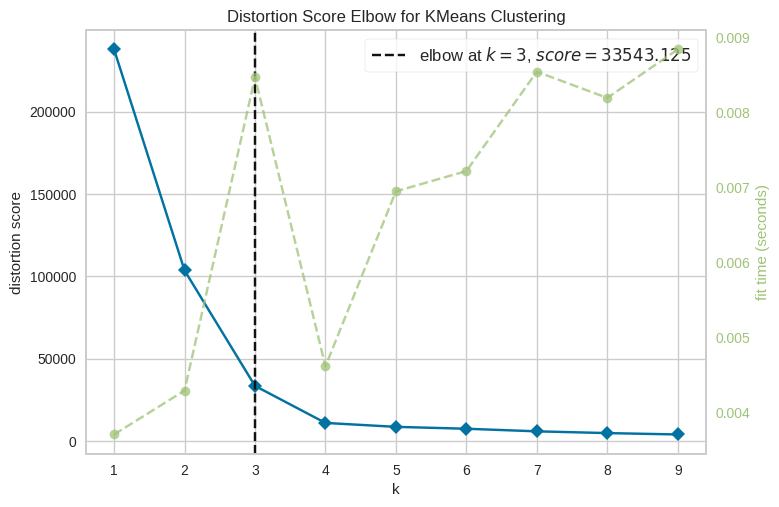

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:
# menggunakan Elbow Method untuk mencari nilai K optimal
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_umap)
visualizer.show()

hasil Elbow Method, titik elbow terdeteksi di K=3, padahal berdasarkan perbandingan Kmeans dan DBSCAN Silhouette Score Kmeans tinggi di K=4 lebih baik. Ini terjadi karena:

Elbow Method mencari "poin tekukan" pada grafik WCSS (distortion score), di mana penurunan WCSS mulai melandai.

Titik elbow tidak selalu berarti jumlah cluster terbaik dalam arti pemisahan data terbaik.

Silhouette Score melihat kualitas cluster, dan hasilnya menunjukkan K=4 memiliki pemisahan lebih baik daripada K=3.

In [122]:
# Aplikasikan nilai K optimal sesuai elbow method menggunakan Kmeans algorithm
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=20, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_umap)
df['KMeans_Cluster'] = kmeans_labels

# evaluasi silhoutte score
sil_score = silhouette_score(X_umap, kmeans_labels)
print(f"Optimal K-Means Silhouette Score: {sil_score:.2f}")

Optimal K-Means Silhouette Score: 0.83


Dari percobaan dengan jumlah cluster (K) yang berbeda, diperoleh Silhouette Score tertinggi sebesar 0.8331 saat K=4.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [123]:
# menghitung jarak setiap titik dengan centroid
distances = np.linalg.norm(X_umap - kmeans.cluster_centers_[kmeans_labels], axis=1)

#Menentukan Ambang Batas untuk Deteksi Penipuan
mean_distance = distances.mean()
std_distance = distances.std()
threshold = mean_distance + 2 * std_distance
df['Potential_Fraud'] = distances > threshold


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


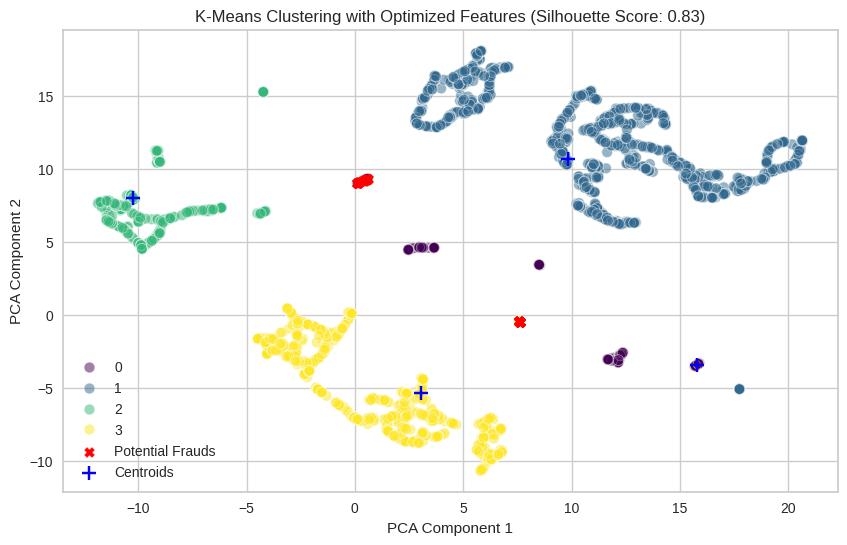

Jumlah potensi penipuan yang terdeteksi (K-Means): 42


In [124]:
# visualisasi scatter menggunakan hasil data preprocess
pca_2d = umap.UMAP(n_components=2) # Call the UMAP class from the umap module
reduced_data = pca_2d.fit_transform(X_umap)
centroids_2d = pca_2d.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(reduced_data[distances > threshold, 0], reduced_data[distances > threshold, 1],
            color='red', s=50, label='Potential Frauds', marker='X')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='blue', s=100, marker='+', label='Centroids')
plt.title(f'K-Means Clustering with Optimized Features (Silhouette Score: {sil_score:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# jumlah potensi penipuan
frauds = df[df['Potential_Fraud']]
print(f"Jumlah potensi penipuan yang terdeteksi (K-Means): {len(frauds)}")

umlah potensi penipuan yang terdeteksi menggunakan K-Means Clustering adalah 42. Ini berarti ada 42 transaksi yang dianggap sebagai anomali atau outlier dalam dataset berdasarkan analisis jaraknya terhadap centroid cluster.



## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [125]:
df['KMeans_Cluster'] = kmeans.labels_
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionHour,TransactionTime,BalanceRatio,LoginRatio,KMeans_Cluster,Potential_Fraud
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,81,1,5112.21,2024-11-04 08:08:08,16,0,0.002756,14.090000,1,False
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,141,1,13758.91,2024-11-04 08:09:35,16,0,0.027345,376.240000,1,False
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,56,1,1122.35,2024-11-04 08:07:04,18,0,0.112523,126.290000,2,False
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,25,1,8569.06,2024-11-04 08:09:06,16,0,0.021531,184.500000,1,False
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,198,1,7429.40,2024-11-04 08:06:39,17,0,0.001810,13.450000,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,...,109,1,12690.79,2024-11-04 08:11:29,17,0,0.067467,856.209999,3,False
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,...,177,1,254.75,2024-11-04 08:11:42,17,0,0.987399,251.540000,3,False
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,...,146,1,3382.91,2024-11-04 08:08:39,17,0,0.008463,28.630000,3,False
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,...,19,1,1776.91,2024-11-04 08:12:22,16,0,0.104659,185.970000,1,False


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [126]:
# Pisahkan fitur numerik dan kategori yang sudah discaling
X_numeric_scaled_df = X_scaled[numeric_features]  # DataFrame hanya dengan fitur numerik yang discaling
X_categorical_df = X_scaled.drop(columns=numeric_features)  # DataFrame hanya dengan fitur kategori

# Inversi data numerik kembali ke skala aslinya
X_numeric_original = scaler.inverse_transform(X_numeric_scaled_df)

# Buat kembali DataFrame hasil inversi numerik
result_df = pd.DataFrame(X_numeric_original, columns=numeric_features)

# Gabungkan kembali fitur kategori (termasuk lokasi)
result_df = pd.concat([result_df, X_categorical_df.reset_index(drop=True)], axis=1)

# Tambahkan fitur lokasi asli jika ada backup-nya sebelum encoding
if 'Original_Location' in df.columns:
    result_df['Location'] = df['Original_Location']

# Tambahkan fitur yang sudah dilabeli
result_df['KMeans_Cluster'] = df['KMeans_Cluster']
result_df['Potential_Fraud'] = df['Potential_Fraud']

# Cek hasil inversi
print(result_df.head())


   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0              14.09         70.0                 81.0         5112.21   
1             376.24         68.0                141.0        13758.91   
2             126.29         19.0                 56.0         1122.35   
3             184.50         26.0                 25.0         8569.06   
4              13.45         26.0                198.0         7429.40   

   LoginAttempts  BalanceRatio  LoginRatio  TransactionHour  TransactionTime  \
0            1.0      0.002756       14.09             16.0              0.0   
1            1.0      0.027345      376.24             16.0              0.0   
2            1.0      0.112523      126.29             18.0              0.0   
3            1.0      0.021531      184.50             16.0              0.0   
4            1.0      0.001810       13.45             17.0              0.0   

   Location_Albuquerque  ...  Location_San Antonio  Location_San Diego  \


 memisahkan fitur numerik dan kategorikal, lalu mengembalikan fitur numerik ke skala aslinya sebelum digabungkan kembali. Proses ini membantu dalam interpretasi hasil clustering, terutama dalam menganalisis pola transaksi dan mendeteksi indikasi penipuan berdasarkan data numerik dan kategorikal.

In [127]:
# Type your code here
# distribusi nilai mean (rata-rata) tiap cluster
cluster_analysis = df.groupby('KMeans_Cluster').agg({
    'TransactionAmount':'mean',
    'CustomerAge':'mean',
    'TransactionDuration':'mean',
    'AccountBalance':'mean',
    'LoginAttempts':'mean',
    'BalanceRatio':'mean',
    'LoginRatio':'mean',
    'Location': lambda x: x.mode()[0],# Dapatkan lokasi yang paling sering
    'TransactionHour':'mean',
    'TransactionTime':'mean',
    'KMeans_Cluster':'mean',
    'Potential_Fraud': lambda x: (x.sum() / len(x)) * 100
}).round(2)

# Menambahkan jumlah dan persentase data di tiap cluster
cluster_sizes = df['KMeans_Cluster'].value_counts()
cluster_analysis['Count'] = cluster_sizes
cluster_analysis['Size_Percent'] = (cluster_sizes / len(df) * 100).round(2)

print("Distribusi nilai mean (rata-rata) tiap cluster:")
print(cluster_analysis)

Distribusi nilai mean (rata-rata) tiap cluster:
                TransactionAmount  CustomerAge  TransactionDuration  \
KMeans_Cluster                                                        
0                          283.54        40.55               132.48   
1                          303.33        45.12               119.03   
2                          274.53        43.94               118.87   
3                          301.77        45.09               118.54   

                AccountBalance  LoginAttempts  BalanceRatio  LoginRatio  \
KMeans_Cluster                                                            
0                      4917.36           3.13          0.20      120.23   
1                      5100.11           1.00          0.20      303.33   
2                      4911.81           1.00          0.18      274.53   
3                      5266.65           1.00          0.21      301.77   

                   Location  TransactionHour  TransactionTime  KMeans_Clus

Tulis hasil interpretasinya di sini.
## Cluster 0:

Rata-rata Jumlah Transaksi: $283.54

Rata-rata Usia Pelanggan: 40.55 tahun

Rata-rata Durasi Transaksi: 132.48 detik

Rata-rata Saldo Rekening: $4,917.36

Rata-rata Upaya Login: 3.13 kali

Persentase Potensi Penipuan: 17.01%

Jumlah Pelanggan: 147 (5.85% dari total)

Lokasi Dominan: Miami

Analisis:
Cluster ini terdiri dari pelanggan dengan jumlah transaksi sedang dan saldo rekening yang relatif rendah. Namun, mereka memiliki jumlah upaya login yang tinggi, yang bisa menunjukkan aktivitas mencurigakan, seperti percobaan login yang gagal. Selain itu, persentase potensi penipuan yang tinggi (17.01%) membuat cluster ini patut diwaspadai.



## Cluster 1:
Rata-rata Jumlah Transaksi: $303.33

Rata-rata Usia Pelanggan: 45.12 tahun

Rata-rata Durasi Transaksi: 119.03 detik

Rata-rata Saldo Rekening: $5,100.11

Rata-rata Upaya Login: 1 kali

Persentase Potensi Penipuan: 0.00%

Jumlah Pelanggan: 1,229 (48.93% dari total)

Lokasi Dominan: Charlotte

Analisis:
Cluster ini merupakan kelompok pelanggan terbesar dengan jumlah transaksi tinggi dan saldo rekening stabil. Mereka memiliki upaya login yang rendah, menunjukkan bahwa mereka tidak mengalami masalah akses akun. Selain itu, tidak ada indikasi penipuan dalam cluster ini, sehingga mereka bisa dianggap sebagai pelanggan yang aman.

## Cluster 2:
Rata-rata Jumlah Transaksi: $274.53

Rata-rata Usia Pelanggan: 43.94 tahun

Rata-rata Durasi Transaksi: 118.87 detik

Rata-rata Saldo Rekening: $4,911.81

Rata-rata Upaya Login: 1 kali

Persentase Potensi Penipuan: 0.00%

Jumlah Pelanggan: 357 (14.21% dari total)

Lokasi Dominan: Fort Worth

Analisis:
Cluster ini memiliki jumlah transaksi yang lebih rendah dibanding cluster lainnya dan saldo rekening yang relatif kecil. Namun, tidak ada indikasi penipuan di dalamnya. Pelanggan dalam cluster ini mungkin lebih berhati-hati dalam melakukan transaksi atau lebih jarang melakukan pembelian.


## Cluster 3:
Rata-rata Jumlah Transaksi: $301.77

Rata-rata Usia Pelanggan: 45.09 tahun

Rata-rata Durasi Transaksi: 118.54 detik

Rata-rata Saldo Rekening: $5,266.65

Rata-rata Upaya Login: 1 kali

Persentase Potensi Penipuan: 2.18%

Jumlah Pelanggan: 779 (31.01% dari total)

Lokasi Dominan: Los Angeles

Analisis:
Cluster ini mencakup pelanggan dengan saldo rekening tertinggi dan jumlah transaksi yang cukup besar. Meskipun potensi penipuan lebih rendah dibanding Cluster 0 (2.18%), tetap ada beberapa transaksi yang mencurigakan. Namun, secara keseluruhan, pelanggan di cluster ini terlihat cukup stabil dalam aktivitas keuangan mereka.





# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [128]:
result_df.to_csv("hasil_clustering.csv", index=False)